# Detecting Fake News Using Sklearn

## Dan Olaleye

The project attempts to accurately differentiate real news from fake news. The PassiveAggresive Classifier was used. In the end, we will be able to assess how well the model would be able to accurately identify fake news.

## Starter Code

In [9]:
import pandas as pd
import numpy as np
import itertools
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
path = '/content/drive/My Drive/Colab Notebooks/Personal Projects/Detecting Fake News/Data/news.csv'
df = pd.read_csv(path)

In [6]:
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [8]:
# Get labels for datasets
labels = df.label
labels.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

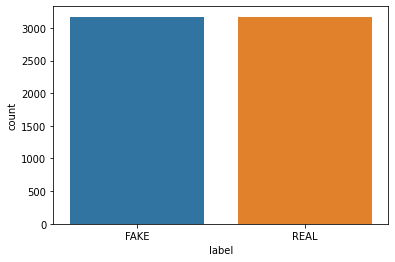

In [10]:
sns.countplot(x='label', data = df)

### Train Test Split

In [0]:
X = df['text']
y = labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

### Initialize TfidfVectorizer

In [0]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

#Fit and transform the train set, transform the test set
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

### Creating a Model

In [15]:
# Fit the Model
model = PassiveAggressiveClassifier(max_iter=50)
model.fit(tfidf_train, y_train)

PassiveAggressiveClassifier(C=1.0, average=False, class_weight=None,
                            early_stopping=False, fit_intercept=True,
                            loss='hinge', max_iter=50, n_iter_no_change=5,
                            n_jobs=None, random_state=None, shuffle=True,
                            tol=0.001, validation_fraction=0.1, verbose=0,
                            warm_start=False)

In [16]:
#Predictions and Accuracy metrics
y_pred = model.predict(tfidf_test)
score = accuracy_score(y_test, y_pred)
print(f'Accuracy: {round(score*100, 2)}%')

Accuracy: 93.53%


In [17]:
# Confusion Matrix
confusion_matrix(y_test, y_pred, labels = ['FAKE', 'REAL'])

array([[912,  56],
       [ 67, 866]])

**The model above produced an accuracy of 93%**